## Lab03 ML

### Question 1: Do private universities or public universities give out more financial aid?

/tmp/ipykernel_693/2777900743.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_clean["aid_value_scaled"] = scaler.fit_transform(uni_clean[['aid_value']])


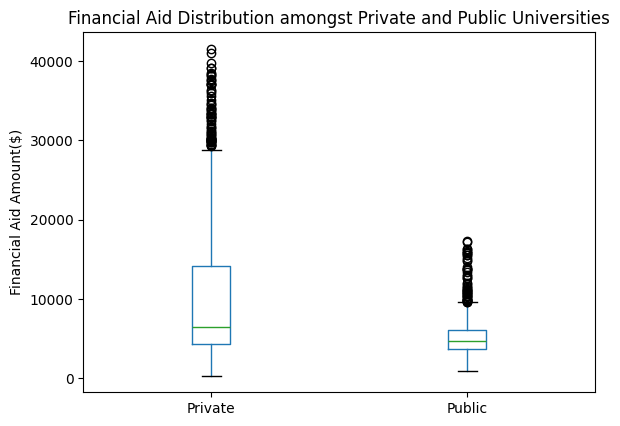

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

uni = pd.read_csv('/workspaces/DS-3021/data/cc_institution_details.csv')
#make private for profit and not for profit into simply one "private" column 
uni['control'] = uni['control'].apply(lambda x: 'Private' if 'Private' in x else 'Public')

uni_clean = uni.dropna(subset=['aid_value'])
#normalize the financial aid data
scaler = StandardScaler()
uni_clean["aid_value_scaled"] = scaler.fit_transform(uni_clean[['aid_value']])

#train 70%
train, temp = train_test_split(uni_clean, test_size=0.3, random_state=42)
tune, test = train_test_split(temp, test_size=0.5, random_state=42)
train.to_csv("train_data.csv", index=False)
tune.to_csv("tune_data.csv", index=False)
test.to_csv("test_data.csv", index=False)

#plot boxplot to compare the aid given out by the corresponding universities
uni_clean.boxplot(column=['aid_value'], by='control', grid=False)
plt.title("Financial Aid Distribution amongst Private and Public Universities")
plt.suptitle("") 
plt.xlabel("")
plt.ylabel("Financial Aid Amount($)")
plt.show()

#### In conclusion: Private universities tend to give higher aid on average. Additionally,other factors should also be taken into account such as demographics, tuition cost would also influence the amount of financial aid given, which are not included in this particular anaysis.

### Question 2: Does MBA GPA Affect employment salary?

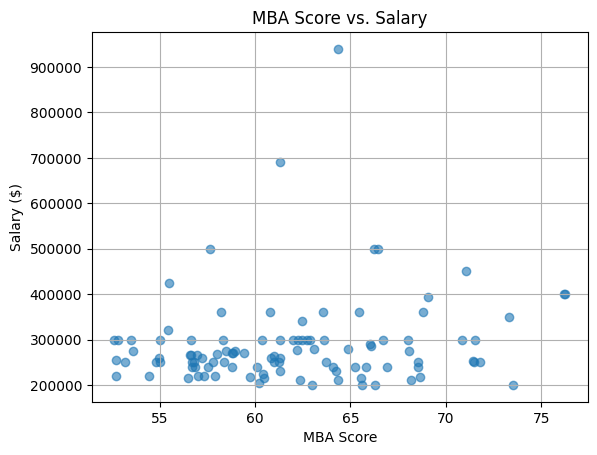

In [21]:
from sklearn.preprocessing import OneHotEncoder

placement_url = "https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv"
placement = pd.read_csv(placement_url)

placement.drop(columns=["sl_no"], inplace=True)

#take out students who are not placed 
placement = placement[placement["status"] == "Placed"]
#drop the missing values
placement = placement.dropna(subset=["salary"])
placement["salary"] = placement["salary"].astype(float)

#use one hot encoding to categorize 
categorical_columns = ["gender", "hsc_s", "degree_t", "specialisation"]
placement = pd.get_dummies(placement, columns=categorical_columns, drop_first=True)
#normalize mba grades
scaler = StandardScaler()
placement["mba_p_scaled"] = scaler.fit_transform(placement[["mba_p"]])

med_salary = placement["salary"].median()
placement["salary_category"] = placement["salary"].apply(lambda x: 1 if x >= med_salary else 0)

#simialr to the first question
train, temp = train_test_split(placement, test_size=0.3, random_state=42)
tune, test = train_test_split(temp, test_size=0.5, random_state=42)
train.to_csv("train_data_salary.csv", index=False)
tune.to_csv("tune_data_salary.csv", index=False)
test.to_csv("test_data_salary.csv", index=False)

#now, we plot

plt.scatter(train["mba_p"], train["salary"], alpha=0.6)
plt.xlabel("MBA Score")
plt.ylabel("Salary ($)")
plt.title("MBA Score vs. Salary")
plt.grid()
plt.show()

#### In conclusion: MBA score doesn't seem to influence salary strongly, there are other factors that are more important which are not reflected in this analysis like networking, the condition of the work force, location, etc. 